# **American Sign Language Recognition Using CNN**

Communication is an important part of our lives. Deaf and dumb people being unable to speak and listen, experience a lot of problems while communicating with normal people. There are many ways by which people with these disabilities try to communicate. One of the most prominent ways is the use of sign language, i.e. hand gestures. It is necessary to develop an application for recognizing gestures and actions of sign language so that deaf and dumb people can communicate easily with even those who don’t understand sign language. The objective of this work is to take an elementary step in breaking the barrier in communication between the normal people and deaf and dumb people with the help of sign language.

American Sign Language (ASL) is a complete, natural language that has the same linguistic properties as spoken languages, with grammar that differs from English. ASL is expressed by movements of the hands and face. It is the primary language of many North Americans who are deaf and hard of hearing, and is used by many hearing people as well.
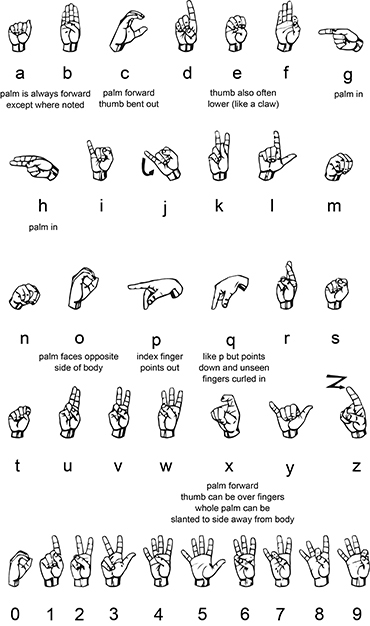]



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

#  **Importing Important Packages**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Loading and Preprocessing the dataset**
The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST handwritten digit dataset but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. 


In [ ]:
train_df=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')
test_df=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test.csv')

In [ ]:
train_df.info()

In [ ]:
test_df.info()

In [ ]:
train_df.describe()

In [ ]:
train_df.head(6)

The train_df dataset consit of 1st column representing labels 1 to 24.
The label is loaded in a seperate dataframe called 'train_label' and the 'label' column is dropped from the original training dataframe which now consist of only 784 pixel values for each image.

In [ ]:
train_label=train_df['label']
train_label.head()
trainset=train_df.drop(['label'],axis=1)
trainset.head()

Converting the dataframe to numpy array type to be used while training the CNN.
The array is converted from  1-D to 3-D which is the required input to the first layer of the CNN.
Similar preprocessing is done to the test dataframe.

In [ ]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

In [ ]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

**Converting the integer labels to binary form**

The label dataframe consist of single values from 1 to 24 for each individual picture. The CNN output layer will be of 24 nodes since it has 24 different labels as a multi label classifier. Hence each integer is encoded in a binary array of size 24 with the corresponding label being 1 and all other labels are 0. Such as if y=4 the the array is [0 0 0 1 0 0.....0].
The LabelBinarizer package from sklearn.preprocessing is used for that. The document link is https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [ ]:
y_train

In [ ]:
X_test=X_test.values.reshape(-1,28,28,1)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

**Augmenting the image dataset to generate new data**

ImageDataGenerator package from keras.preprocessing.image allows to add different distortions to image dataset by providing random rotation, zoom in/out , height or width scaling etc to images pixel by pixel.

Here is the package details https://keras.io/preprocessing/image/

The image dataset in also normalised here using the rescale parameter which divides each pixel by 255 such that the pixel values range between 0 to 1.

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255

# **Visualization of the Dataset**

**Preview of the images in the training dataset**

In [ ]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

**Frequency plot of the labels**

In [ ]:
sns.countplot(train_label)
plt.title("Frequency of each label")

# **Building the CNN Model**

The model consist of :
1. Three convolution layer each followed bt MaxPooling for better feature capture
2. A dense layer of 512 units
3. The output layer with 24 units for 24 different classes

**Convolution layers**

Conv layer 1 -- UNITS - 128  KERNEL SIZE - 5 * 5   STRIDE LENGTH - 1   ACTIVATION - ReLu

Conv layer 2 -- UNITS - 64   KERNEL SIZE - 3 * 3   STRIDE LENGTH - 1   ACTIVATION - ReLu

Conv layer 3 -- UNITS - 32   KERNEL SIZE - 2 * 2   STRIDE LENGTH - 1   ACTIVATION - ReLu




MaxPool layer 1 -- MAX POOL WINDOW - 3 * 3   STRIDE - 2

MaxPool layer 2 -- MAX POOL WINDOW - 2 * 2   STRIDE - 2

MaxPool layer 3 -- MAX POOL WINDOW - 2 * 2   STRIDE - 2

In [ ]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

**Dense and output layers**

In [ ]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Training the model**

In [ ]:
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

**Evaluating the model**

In [ ]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

In [ ]:
print('MODEL ACCURACY = {}%'.format(acc*100))